In [57]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from pathlib import Path
import os
from PIL import Image
from tensorflow.keras import layers

In [58]:
## here I have a path to an image ##
images = "ImageClassificationProject/train/train/Plum/Plum_0.jpg"

In [59]:
## here I am reading the image with matplotlib.image ##
img = mpimg.imread(images)

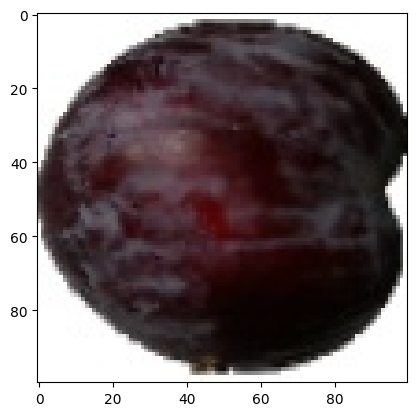

In [60]:
## here I am then showing the image in the notebook ##
plt.imshow(img)

In [61]:
## I have my data split into two folders, one for training data and the other is for test data ##
trainingDataset = "ImageClassificationProject/train/train"
testDataset = "ImageClassificationProject/test/test"

In [62]:
## here I am finding the size of my training dataset ## 
indexes = []
for i in range(len(trainingDataset)):
    indexes.append(i)
print(indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [63]:
## here I am finding all of the sub-folders within my training dataset ##
typesOfImages = []
trainingDataset = Path("ImageClassificationProject/train/train")
testDataset = Path("ImageClassificationProject/test/test")

for f in trainingDataset.iterdir():
    if f.is_dir():
        typesOfImages.append(f.name)
print(typesOfImages)

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [64]:
## this function gives me some data about the image ##
def imageDetails(image):
    y = Image.open(image)
    print("image format:", y.format)
    print("image size:", y.size)
    print("image mode:", y.mode)

In [65]:
## here I am getting all of the class names (fruit names) ##
classes = typesOfImages

In [66]:
def getFruitImage():
    userWantsThisFruit = int(input("What fruit do you want? Enter in a number:"))
    fruitType = typesOfImages[userWantsThisFruit] ## gets a fruit type, for eg, BlueBerry

    fruitType = os.path.join(trainingDataset, fruitType) ## gives you this: 'ImageClassificationProject\\train\\train\\Limes'
    
    fruitImage = os.listdir(fruitType) ## gives my everything with a sub folder for a fruit 

    useruserWantsThisFruitImage = int(input("Enter a number for what image you want:"))
    combined = fruitType + "\\" + fruitImage[useruserWantsThisFruitImage] ## gives you this: 'ImageClassificationProject\\train\\train\\Limes\\Limes_103.jpg'

    fruitContents = combined

    ## call my function that I wrote previously ##
    imageDetails(fruitContents)
    
    ## here I am reading the image with matplotlib.image ##
    img = mpimg.imread(fruitContents)
    plt.figure(figsize=(15, 2))

    ## here I am then showing the image in the notebook ##
    plt.imshow(img)

    ## here I am setting the x axis to be the name of the fruit ##
    plt.xlabel(classes[userWantsThisFruit])

{0: 'Apple Braeburn', 1: 'Apple Granny Smith', 2: 'Apricot', 3: 'Avocado', 4: 'Banana', 5: 'Blueberry', 6: 'Cactus fruit', 7: 'Cantaloupe', 8: 'Cherry', 9: 'Clementine', 10: 'Corn', 11: 'Cucumber Ripe', 12: 'Grape Blue', 13: 'Kiwi', 14: 'Lemon', 15: 'Limes', 16: 'Mango', 17: 'Onion White', 18: 'Orange', 19: 'Papaya', 20: 'Passion Fruit', 21: 'Peach', 22: 'Pear', 23: 'Pepper Green', 24: 'Pepper Red', 25: 'Pineapple', 26: 'Plum', 27: 'Pomegranate', 28: 'Potato Red', 29: 'Raspberry', 30: 'Strawberry', 31: 'Tomato', 32: 'Watermelon'}
image format: JPEG
image size: (100, 100)
image mode: RGB


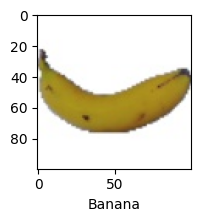

In [67]:
## here I created a dictionary for each index with a fruit ##
mapping = dict(zip(indexes, typesOfImages))
print(mapping)

getFruitImage()

In [68]:
## here I am creating a training dataset from the images that are in my training dataset from above ##
train_dataset = tf.keras.utils.image_dataset_from_directory(
    trainingDataset, ## path to my training dir
    validation_split=0.2, ## here I split the data to be 20% for validation
    subset="training", ## Specifying that this is for training
    seed=123, ## set random value, to ensure a different split each time
    image_size=(25, 25), ## changing the size of the image
    batch_size=32 ## the amount of batches while training
)

Found 16854 files belonging to 33 classes.
Using 13484 files for training.


In [69]:
## here I am creating a validation dataset from the images that are in my test dataset from above ##
val_dataset = tf.keras.utils.image_dataset_from_directory(
    trainingDataset, ## path to my training dir
    validation_split=0.2, ## here I split the data to be 20% for validation
    subset="validation", ## Specifying that this is for validation
    seed=123, ## set random value, to ensure a different split each time
    image_size=(25, 25), ## changing the size of the image
    batch_size=32 ## the amount of batches while training
)

Found 16854 files belonging to 33 classes.
Using 3370 files for validation.


In [70]:
## this contains all of the classes (fruit) names ##
classNames = train_dataset.class_names

In [71]:
## here I am making a Convolutional neural network model ##
model = keras.Sequential([
    ## here I have my first cnn layer with 32 filters, 3x3 kernal and my activation function is Relu ##
    layers.Conv2D(32, (3,3), activation='relu'),
    
    ## here I have a max pooling layer, this reduces the dimension to be a 2x2 window ##
    layers.MaxPooling2D(2,2),

    ## here I have second cnn layer
    layers.Conv2D(64, (3,3), activation='relu'),
    
    ## here I have a max pooling layer, this reduces the dimension to be a 2x2 window ##
    layers.MaxPool2D(2,2),
    
    ## here I have a third cnn layer 
    layers.Conv2D(128, (3,3), activation='relu'),
    
    ## here I have a max pooling layer, this reduces the dimension to be a 2x2 window ##
    layers.MaxPool2D(2,2),

    ## here I reshape the feature map into a 1d vector for the Dense layers ##
    layers.Flatten(),

    ## here I have a fully connected Dense layer with 512 neurons and Relu as my activation function ## 
    layers.Dense(512, activation='relu'),

    ## this here is my output layer with soft-max to classify depending on the lenght of classNames
    layers.Dense(len(classNames), activation='softmax')
])

In [72]:
## I am using adam to have an adaptive learning rate and efficient training
## loss: function for multi-class classification
## accuracy during training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
## print the model summary ##
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
## here I am training my cnn model, on my train_dataset and val_dataset ##
## I train my model for 10 epochs. An epoch is one iteration over the entire training dataset ##
model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.6878 - loss: 1.6959 - val_accuracy: 0.9920 - val_loss: 0.0271
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9663 - loss: 0.1153 - val_accuracy: 1.0000 - val_loss: 5.4810e-04
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 4.8948e-04 - val_accuracy: 1.0000 - val_loss: 1.2540e-04
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 9.4165e-05 - val_accuracy: 1.0000 - val_loss: 6.5408e-05
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 4.5284e-05 - val_accuracy: 1.0000 - val_loss: 4.3190e-05
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 2.9631e-05 - val_accuracy: 1.0000 - val_loss: 2.9813e-05
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 2.0611e-05 - val_accuracy: 1.0000 - val_loss: 2.1213e-05
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accu

In [75]:
## here I find the loss and model accuracy for my val_dataset ##
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {accuracy:.2f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.7189e-06
Validation Accuracy: 1.00


In [76]:
y_true = []
y_pred = []

for images, labels in val_dataset:
    ## here I get the model prediction's ##
    preds = model.predict(images)

    ## here I add the true labels to the y_true array ##
    y_true.extend(labels.numpy())

    ## here I convert the predictions to be a class index ##
    y_pred.extend(np.argmax(preds, axis=1)) 

# here I convert the two arrays y_true and y_pred to be a numpy array ##
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

## here I create a confusion matrix for my y_true and y_pred variables ##
cm = confusion_matrix(y_true, y_pred)

In [78]:
cm

array([[104,   0,   0, ...,   0,   0,   0],
       [  0,  92,   0, ...,   0,   0,   0],
       [  0,   0,  95, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  85,   0,   0],
       [  0,   0,   0, ...,   0, 149,   0],
       [  0,   0,   0, ...,   0,   0,  99]])

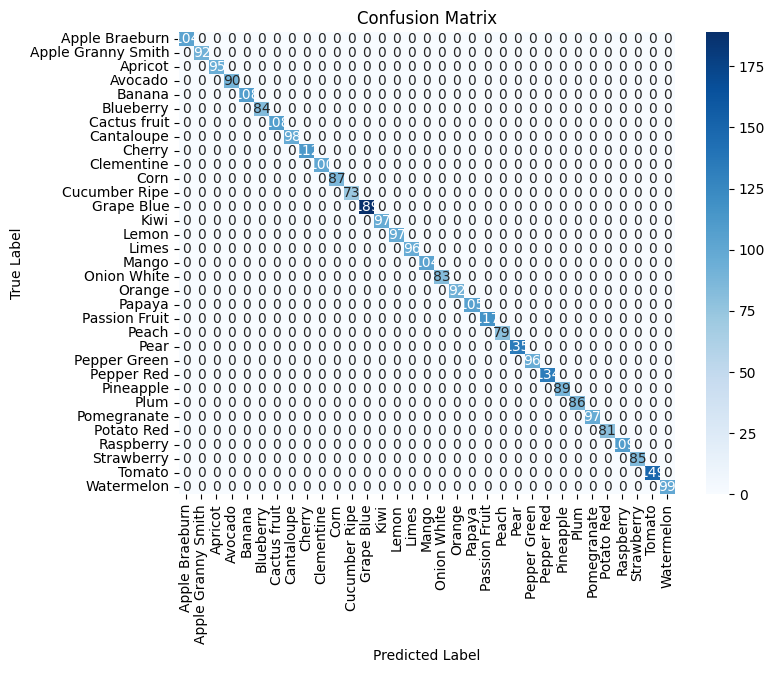

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [80]:
import numpy as np
from tensorflow.keras.preprocessing import image

## here I have wrote a function. My function takes in an index, this index maps to a certain fruit. For example, index 4 is a banana
## and index 5 is a blueberry etc. Depending on what index you enter this will go to the typesOfImages, this is all of the classes and get you 
## a fruit for that index. Then this is given to my cnn model to classify, what fruit it thinks it is, this is based off the training data. ##

def cnnPredictFruit(index):
    dir = os.path.join(trainingDataset, typesOfImages[index])
    fruitImage = os.listdir(dir) ## gives my everything with a sub folder for a fruit
    combined = dir + "\\" + fruitImage[index]

    ## here I load the image and prepare it for the cnn model ##
    img_path = combined

    ## here I resize the image to match the model input size ##
    img = image.load_img(img_path, target_size=(25, 25))

    ## here I convert the image to an array ##
    img_array = image.img_to_array(img)

    # here I Expand the dimension to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)

    ## here my model does a prediction ## 
    predictions = model.predict(img_array)

    ## here I get the class with the highest probability
    predicted_class = classNames[np.argmax(predictions)]
    print(f"Predicted class: {predicted_class}")

    ## here I am reading the image with matplotlib.image ##
    img = mpimg.imread(combined)
    plt.figure(figsize=(15, 2))

     ## here I am then showing the image in the notebook ##
    plt.imshow(img)

    ## here I am setting the x axis to be the name of the fruit ##
    plt.xlabel(classes[index])
    plt.title("My model predicted this image to be")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class: Blueberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: Apple Granny Smith
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: Orange


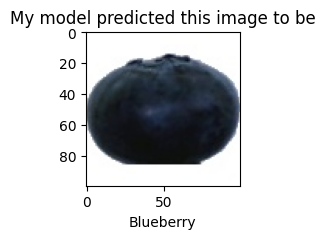

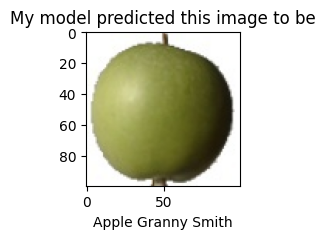

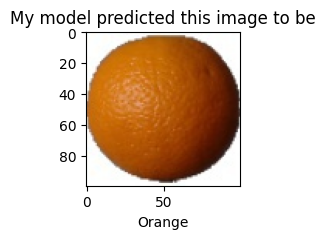

In [84]:
cnnPredictFruit(5) ## call my function and give the index to be 5 (I should get an image of a blueberry)
cnnPredictFruit(1) ## call my function and give the index to be 1 (I should get an image of a apple Granny Smith)
cnnPredictFruit(18) ## call my function and give the index to be 18 (I should get an image of a Orange)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: Apple Braeburn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: Apple Granny Smith
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: Apricot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Avocado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Blueberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Cactus fruit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Cantaloupe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Cherry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Clementine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Corn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Cucumber Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: Grape Blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Kiwi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Lemon
1/1 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\Kylek\AppData\Local\Temp\ipykernel_23272\4053660468.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Pepper Green
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Pepper Red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Pineapple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: Plum
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: Pomegranate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: Potato Red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Raspberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Strawberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: Tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: Watermelon


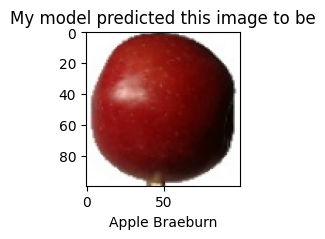

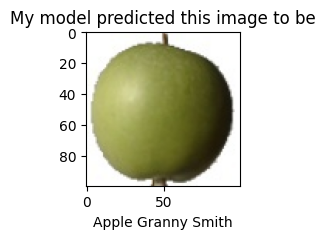

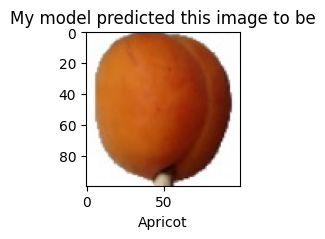

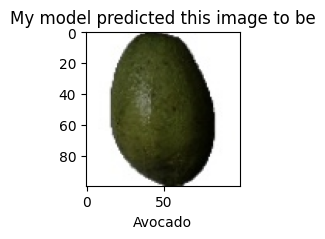

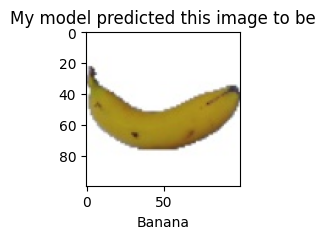

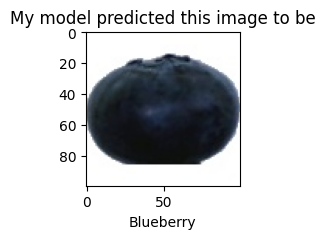

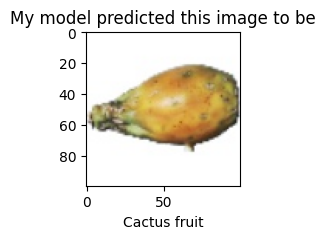

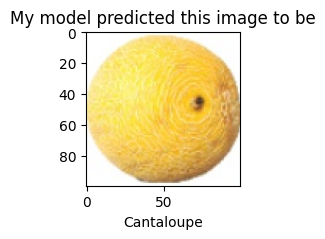

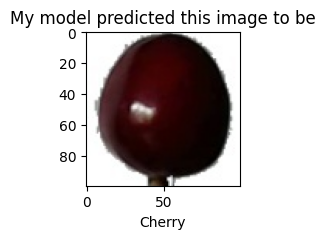

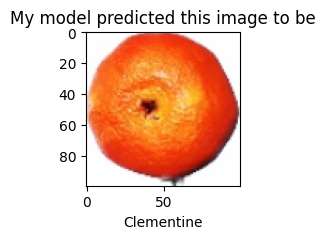

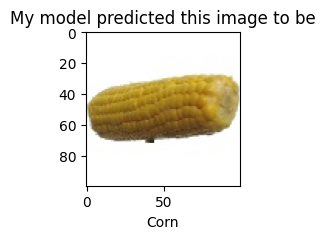

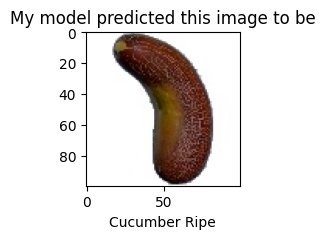

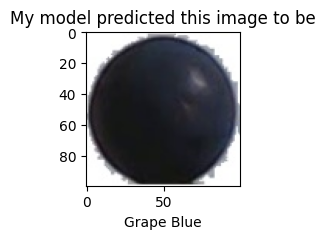

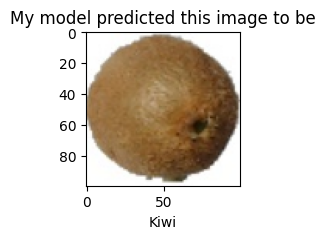

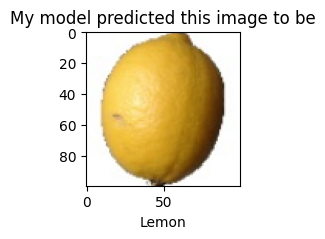

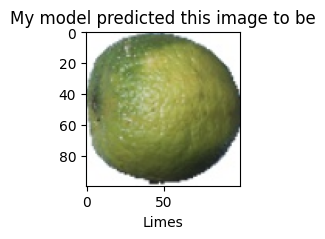

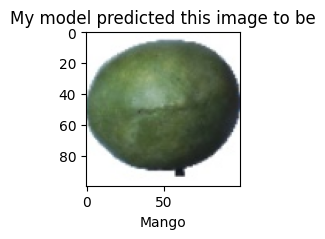

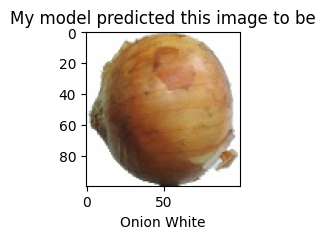

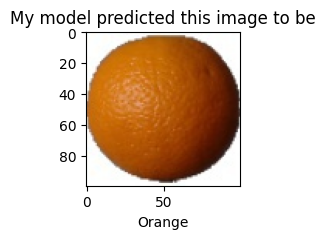

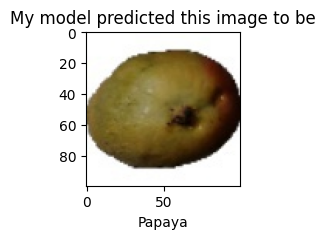

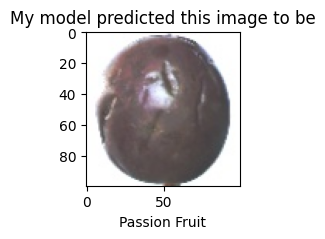

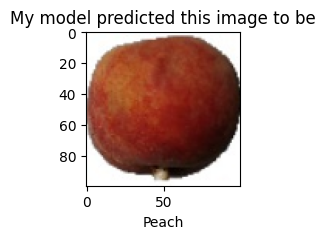

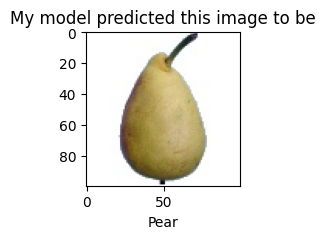

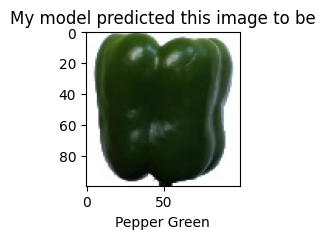

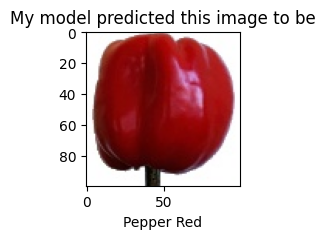

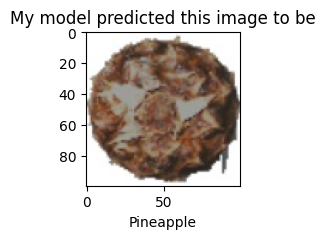

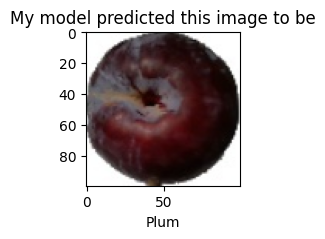

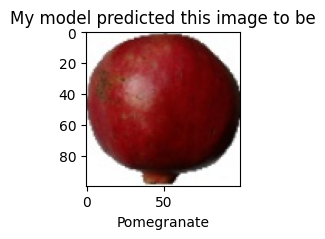

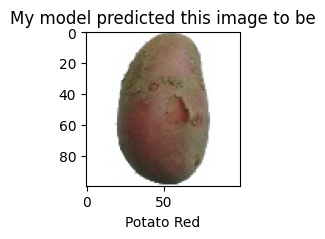

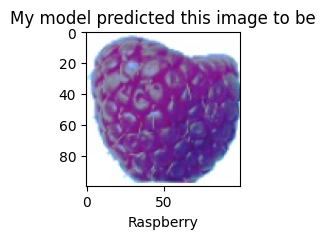

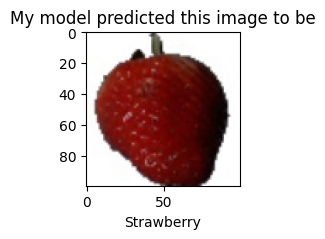

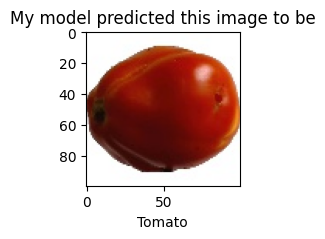

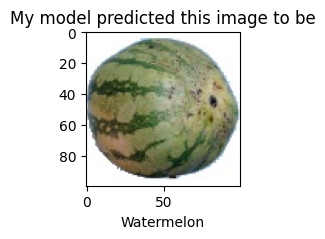

In [85]:
for i in range(len(typesOfImages)):
    cnnPredictFruit(i)